In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Coin Tossing

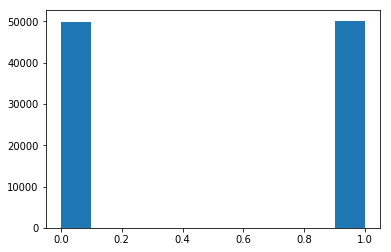

In [2]:
sample_space = [0, 1]
draws = []

for i in range(100000):
    draws.append(np.random.choice(sample_space))
    
_ = plt.hist(draws)

# Probability Mass Function

Given a discrete sample space, we associate a probability mass $P(x)$ with every point $x$ in that space, such that:

$$\sum_{x} P(x) = 1$$

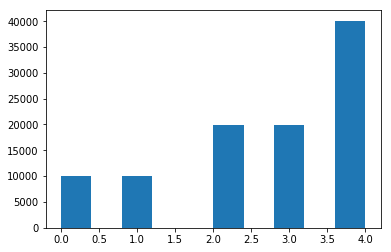

In [3]:
sample_space = [0, 1, 2, 3, 4]
pmf = [0.1, 0.1, 0.2, 0.2, 0.4]
draws = []

for i in range(100000):
    draws.append(np.random.choice(sample_space, p=pmf))
    
_ = plt.hist(draws)

# Random variable

Loosely, $X$ is a **random variable** if it follows a distribution, e.g.

$$X \sim \text{Bernoulli(p)}$$

Then $X$ takes values from $\{0, 1\}$, with the corresponding probabilities $1-p$ and $p$.

# Some important distributions

**Bernoulli distribution:** Bernoulli(p), sample space = $\{0, 1\}$  
*Probability of getting a head on an unfair coin*  
$$P(X=0) = 1-p$$  
$$P(X=1) = p$$

**Binomial distribution:** Binomial(p, n), sample space = $\{0, 1, \dots, n\}$  
*Probability of getting $k$ heads on tossing $n$ unfair coins*  
$$P(X=k) = {n \choose x} p^k (1-p)^{n-k}$$  

**Poisson distribution:** Poisson($\lambda$)  
*Models an arrival process with a mean and variance of $\lambda$*
$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

# Sampling

In reality, we do not work with ideal distributions. We have some *samples* drawn from it.  

$D = \{x_1, x_2, \dots x_n\}$

$n$ is called the sample size. Let us try sampling from the above distributions:

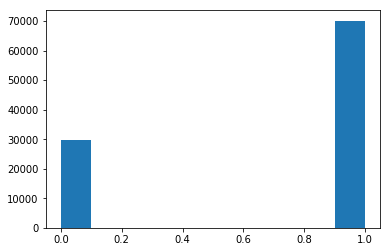

In [4]:
# Bernoulli(0.7)
p = 0.7
draws = np.random.binomial(1, p, size=100000)
_ = plt.hist(draws)

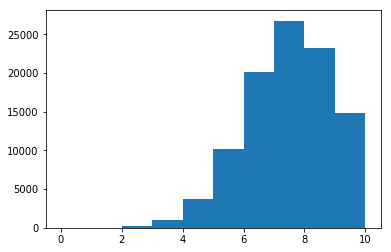

In [5]:
# Binomial(10, 0.7)
n = 10
p = 0.7
draws = np.random.binomial(n, p, size=100000)
_ = plt.hist(draws, bins=10)

Note the peak at $k = 7$!

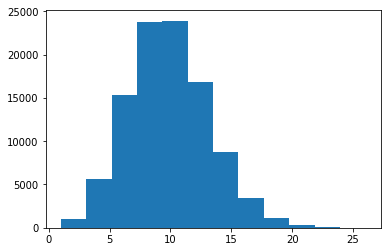

In [6]:
# Poisson(10)
lambda_ = 10
draws = np.random.poisson(lambda_, size=100000)
_ = plt.hist(draws, bins=12)

Note the peak at $k = 7$!

# Moments of a distribution

The **expectation** of a distribution is:

$$E[X] = \sum_{x \in X} x \times p(x)$$

The **sample mean** of a set of data $D = \{x_1, x_2, \dots x_n\}$ is:

$$\bar D = \frac{1}{n} \sum_{i = 0}^n x_i$$

**Result:** As $n \rightarrow \infty$, $\bar D \rightarrow E[X]$.

For the distributions above,
1. Mean of Bernoulli(p) is $p$.
2. Mean of Binomial(n, p) is $np$.
3. Mean of Poisson($\lambda$) is $\lambda$ (by design).

Note that the mean coincides with the peak of the above distributions! (Usually true for single-peaked distributions.)

The **variance** of a distribution is defined as:  
$$Var(X) = \sum_{x \in X} (x - E[X])^2 \times p(x)$$

The sample variance can be analogously defined as:
$$Var(D) = \frac{1}{n} \sum_{i=0}^n (x_i - \bar D)^2$$

The variance of Binomial(n, p) is $np(1-p)$ and that of Poisson($\lambda$) is again $\lambda$, by design.

In [7]:
# Binomial(10, 0.7)
n = 10
p = 0.7
draws = np.random.binomial(n, p, size=100000)

print 'Distribution mean:', n*p
print 'Distribution variance:', n*p*(1-p), '\n'

print 'Sample mean:', np.mean(draws).round(4)
print 'Sample variance:', np.var(draws).round(4)

Distribution mean: 7.0
Distribution variance: 2.1 

Sample mean: 6.9977
Sample variance: 2.0963


In [8]:
# Poisson(10)
lambda_ = 10
draws = np.random.poisson(lambda_, size=100000)

print 'Distribution mean:', lambda_
print 'Distribution variance:', lambda_, '\n'

print 'Sample mean:', np.mean(draws).round(4)
print 'Sample variance:', np.var(draws).round(4)

Distribution mean: 10
Distribution variance: 10 

Sample mean: 10.0008
Sample variance: 10.0374


The expectation is called the **first moment** of the distribution.  
$E(X^2)$ is the second moment, and it is related to the variance by:

$$E(X^2) = E(X^2) - E(X)^2$$

Further moments can be determined as $E(X^3), E(X^4), ...$

**Result:** If **all** moments of two distributions match, they are identical.  
Moments allow us to reason about the distributions, and sample mean, variance, etc. allow us, in turn, to reason about the moments.

# Continous random variables

If the sample space is a continuous set, we redefine the notion of probability in terms of integrals:

$$\int_{x} f(x) = 1$$

In particular, the probability of any single point is $0$, i.e. $P(X=k) = 0$ in a continuous sample space.  
So, we instead make use of $f(x)$, a **probability density function**.

The normal distribution, $\mathcal{N}(\mu, \sigma)$ is the most important of these.

$$P(x = k) \propto \exp \Bigg(- \frac{(x - \mu)^2}{2 \sigma^2}\Bigg)$$

This is a single-peaked distribution with a mean of $\mu$ and a variance of $\sigma^2$ (by design).

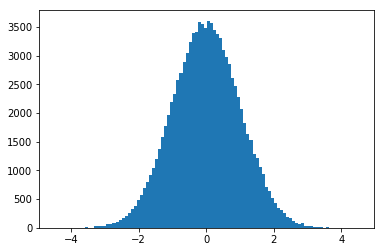

In [9]:
# Normal(0, 1)
mu = 0
sigma = 1
draws = np.random.normal(loc=mu, scale=sigma, size=100000)

_ = plt.hist(draws, label='Normal', bins=100)

# Moments of a continous RV

The moments are redefined using density and integrals:

$$E[X] = \int_{x} x \cdot f(x)$$  
$$Var[X] = \int_{x} x \cdot (f(x) - E[X])^2$$

The expression for computing the sample mean and variance, of course, remain the same.

In [10]:
print 'Distribution mean:', mu
print 'Distribution variance:', sigma ** 2, '\n'

print 'Sample mean:', np.mean(draws).round(4)
print 'Sample variance:', np.var(draws).round(4)

Distribution mean: 0
Distribution variance: 1 

Sample mean: 0.0023
Sample variance: 0.9934
